<a href="https://colab.research.google.com/github/Ganesh1829/Machine_learning/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


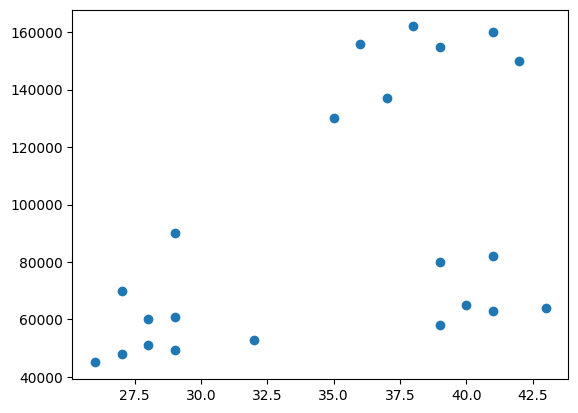

In [ ]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
km = KMeans(n_clusters = 3)
km


KMeans(n_clusters=3)

In [ ]:
print(km.get_params())

{'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [ ]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


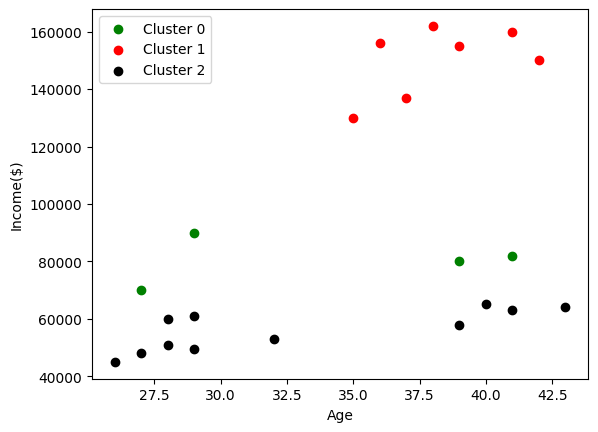

In [ ]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')

plt.xlabel('Age')  # Ensure plt.xlabel() is used correctly
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [ ]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [ ]:
km = KMeans(n_clusters = 3)
km.fit(df[['Age','Income($)']])
df['cluster'] = km.predict(df[['Age','Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


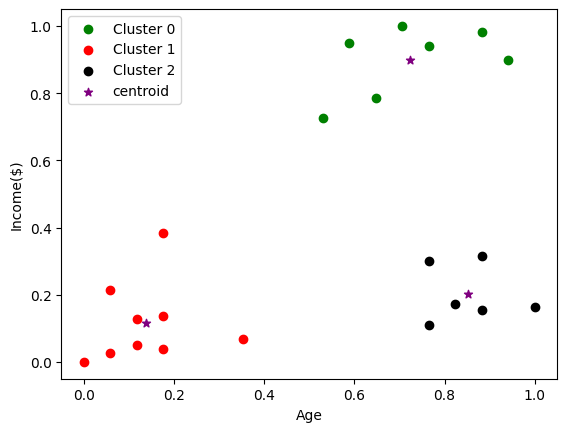

In [ ]:


df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='black', label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label = 'centroid')
plt.xlabel('Age')  # Ensure plt.xlabel() is used correctly
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])